[python data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html)

[pd.plot guide with code](http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

In [5]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','john','jeff','bill','lisa','lisa'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,john,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,lisa,20,M,texas,4,3


### Plotting interactively within an IPython notebook can be done with the %matplotlib
* After running this command (it needs to be done only once per kernel/session), any cell within the notebook that **creates a plot** will embed a PNG image of the resulting graphic:
* If you are using Matplotlib from within a script, the function **plt.show()** is your friend. plt.show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

```
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```
You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed: 
``$ python myplot.py``
* The **plt.show()** command does a lot under the hood, as it must interact with your system's interactive graphical backend.

* ``%matplotlib notebook`` will lead to **interactive plots** embedded within the notebook
* ``%matplotlib inline`` will lead to **static images** of your plot embedded in the notebook

``%matplotlib inline``
* After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

In [12]:
%matplotlib inline

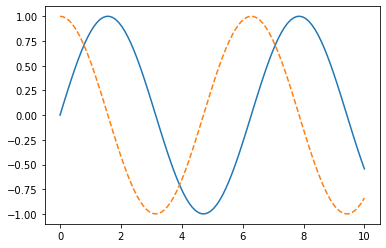

In [13]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### saving file to file : fig.savefig('my_figure.png')

In [14]:
#any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:
fig.savefig('my_figure.png')

In [16]:
# !ls -a
!ls -lh my_figure.png

-rw-r--r-- 1 ys ys 23K Feb  8 04:57 my_figure.png


### let's use the IPython Image object to display the contents of this file: Image('my_figure.png')

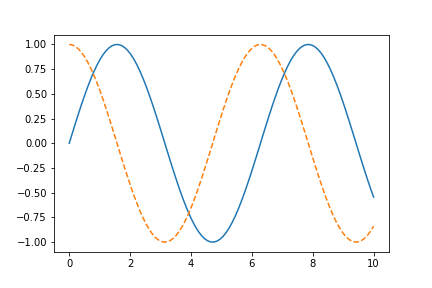

In [17]:
from IPython.display import Image
Image('my_figure.png')

### The MATLAB-style tools are contained in the pyplot (plt) 
* this interface is stateful: it keeps track of the "current" figure and axes, which are where all **plt** commands are applied. 
    * You can get a reference to these using the **plt.gcf()** (get current figure) and **plt.gca()** (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? =>
* The **object-oriented interface** is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the **plotting functions are methods of explicit Figure and Axes objects**. To re-create the previous plot using this style of plotting, you might do the following:

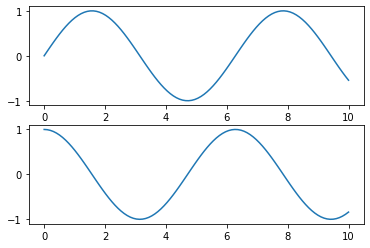

In [18]:
# fig: First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object( x ) #x = np.linspace(0, 10, 100)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));


### Simple Line Plots

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import numpy as np

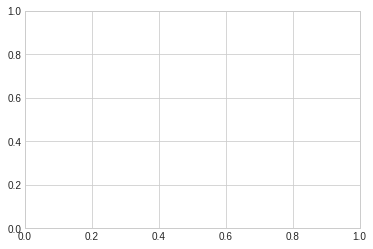

In [21]:
fig = plt.figure()#instance of the class plt.Figure
ax = plt.axes()#instance of the class plt.Axes

In Matplotlib, the **figure** (an instance of the **class plt.Figure**) can be thought of as a single **container** that contains all the objects representing axes, graphics, text, and labels. The **axes** (an instance of the **class plt.Axes**) is **what we see above**: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. Variable name **fig** for figure instance, **ax** for axes instance.

### Once we have created an axes, we can use the ax.plot function to plot some data. :ax.plot(x, np.sin(x))

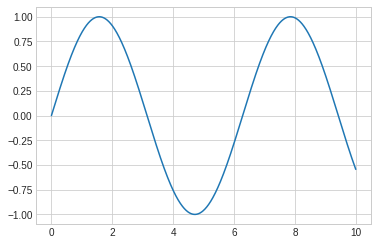

In [23]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x)); #plot some data

tow line plot by ax[0].plot(), ax[1].plot() as shown above cell

``ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));``

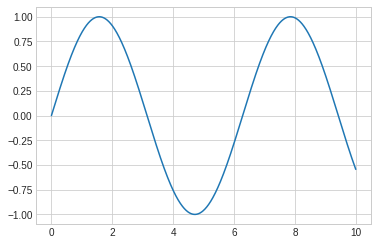

In [24]:
plt.plot(x, np.sin(x));

#### If we want to create a single figure with multiple lines, we can simply call the plot function multiple times:

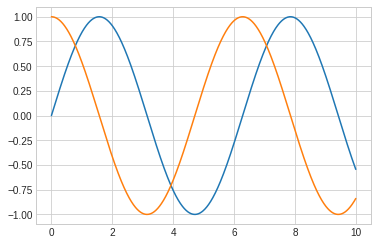

In [25]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

### Plot two dataframe columns as a scatter plot
[plt.show() Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)

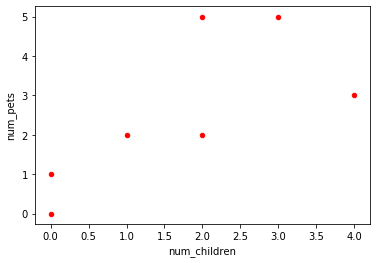

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

### Plot column values as a bar plot

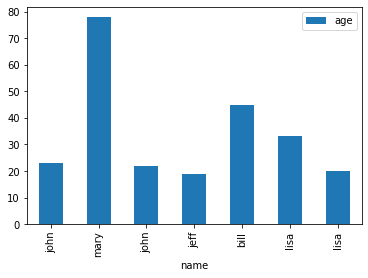

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')

In [11]:
df2 = pd.DataFrame({
    'name1':['john2','mary2','peter2','jeff2','bill2','lisa2','jose2'],
    'weight':[100,120,111,103,145,99,230],
    'gender1':['M','F','M','M','M','F','M'],    
})
df2

,name1,weight,gender1
0,john2,100,M
1,mary2,120,F
2,peter2,111,M
3,jeff2,103,M
4,bill2,145,M
5,lisa2,99,F
6,jose2,230,M


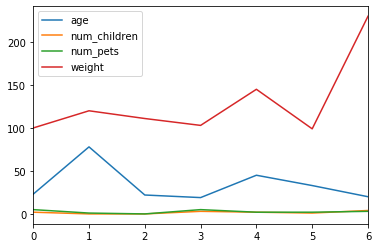

In [59]:
#joining dataframe
ax = df.plot()
df2.plot(ax=ax)

### Line plot with multiple columns : Just reuse the Axes object.
* ax = plt.gca()

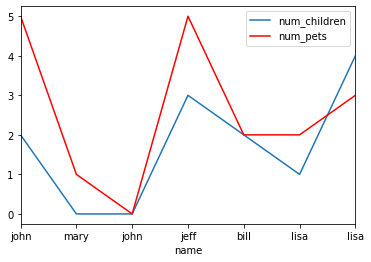

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

### Save plot to file
* Instead of calling plt.show(), call plt.savefig('outputfile.png'):

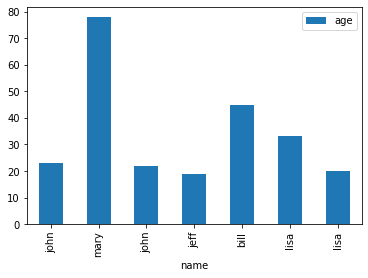

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

### Bar plot with group by

In [62]:
for x in df.groupby('state')['name']:
    print(x)
    print("-----------------------------")

('california', 0    john
2    john
4    bill
Name: name, dtype: object)
-----------------------------
('dc', 1    mary
3    jeff
Name: name, dtype: object)
-----------------------------
('texas', 5    lisa
6    lisa
Name: name, dtype: object)
-----------------------------


In [63]:
df.groupby('state')['name'].nunique()

state
california    2
dc            2
texas         1
Name: name, dtype: int64

In [67]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,john,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,lisa,20,M,texas,4,3


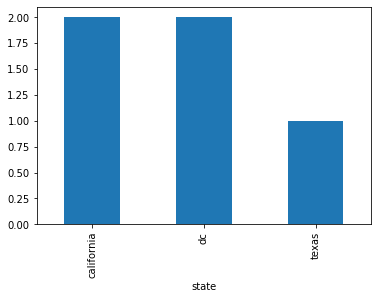

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

### Stacked bar plot with group byPermalink
Example: plot count by category as a stacked column:

create a dummy variable and do a two-level group-by based on it:

fix the x axis label and the legend

In [78]:
for x in df.assign(dummy = 1).groupby(['dummy','state']):
    print(x)
    print("-----------------------------------------------------------------")

((1, 'california'),    name  age gender       state  num_children  num_pets  dummy
0  john   23      M  california             2         5      1
2  john   22      M  california             0         0      1
4  bill   45      M  california             2         2      1)
-----------------------------------------------------------------
((1, 'dc'),    name  age gender state  num_children  num_pets  dummy
1  mary   78      F    dc             0         1      1
3  jeff   19      M    dc             3         5      1)
-----------------------------------------------------------------
((1, 'texas'),    name  age gender  state  num_children  num_pets  dummy
5  lisa   33      F  texas             1         2      1
6  lisa   20      M  texas             4         3      1)
-----------------------------------------------------------------


In [72]:
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size()

dummy  state     
1      california    3
       dc            2
       texas         2
dtype: int64

In [74]:
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame()

0
dummy state        
1     california  3
      dc          2
      texas       2

In [75]:
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack()

0         
state california dc texas
dummy                    
1              3  2     2

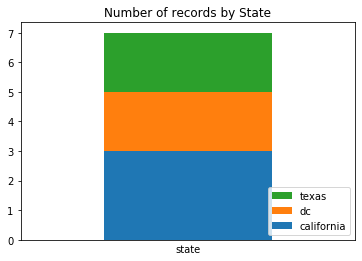

In [68]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()